In [1]:
import math
import numpy as np
from tqdm import tqdm

def binom(n, k):
    """
    Compute the binomial coefficient "n choose k" using an iterative approach.
    This avoids using math.comb.
    """
    if k > n:
        return 0
    # Take advantage of symmetry: C(n, k) = C(n, n-k)
    if k > n - k:
        k = n - k
    result = 1
    for i in range(1, k + 1):
        result = result * (n - i + 1) // i
    return result

def partition_function_Curie_Weiss(N, beta, J, h=0.0):
    """
    Computes the partition function Z of the Curie–Weiss model exactly.

    Parameters:
    - N (int): Number of spins.
    - beta (float): Inverse temperature (1/kT).
    - J (float): Coupling constant.
    - h (float): External magnetic field (default 0).

    Returns:
    - Z (float): The exact partition function.
    """
    Z = 0.0
    # Magnetization M can take values -N, -N+2, ..., N-2, N.
    M_vals = np.arange(-N, N + 1, 2)
    for M in tqdm(M_vals):
        # For a given M, the number of up spins is given by k = (N + M)/2.
        k = (N + M) // 2
        # Binomial factor: the number of ways to have k up spins.
        multiplicity = binom(N, k)
        # Energy: E(M) = -J/(2N) * M^2 - h*M.
        E = -J / (2 * N) * M**2 - h * M
        # Boltzmann weight: exp(-beta * E)
        weight = np.exp(-beta * E)
        Z += multiplicity * weight
    return Z

In [3]:
N = 20
beta = 1  # Inverse temperature
J = 1.0     # Coupling constant
h = 0.0     # External field (can be changed if needed)

Z = partition_function_Curie_Weiss(N, beta, J, h)
print("Exact Partition Function Z =", Z)

100%|██████████| 21/21 [00:00<00:00, 12310.33it/s]

Exact Partition Function Z = 3140256.4001833405


In [36]:
N = [20, 60, 100, 200, 400, 800, 1000]
grads = [0.210102,0.132422, 0.105536,0.0768534,0.0555126, 0.0398585,0.035791]

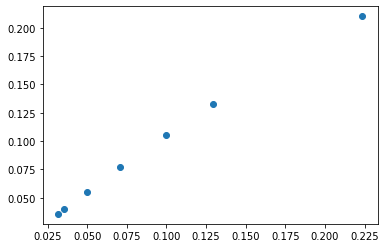

In [54]:
plt.scatter(1/np.array(N)**0.5,np.array(grads))

Slope (coefficient[0]): -0.46595474101951584
Intercept (coefficient[1]): -0.10540141264651015


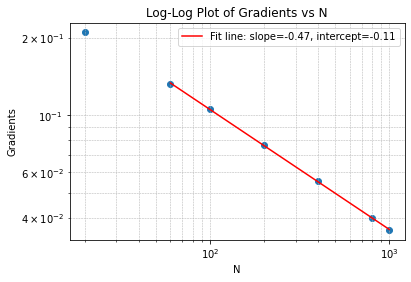

In [57]:
import matplotlib.pyplot as plt
plt.scatter(N,grads)
plt.yscale('log')
plt.xscale('log')
# Exclude the first point
N_fit = N[1:]
grads_fit = grads[1:]

# Perform linear fit
coefficients = np.polyfit(np.log(N_fit), np.log(grads_fit), 1)
print("Slope (coefficient[0]):", coefficients[0])
print("Intercept (coefficient[1]):", coefficients[1])
fit_line = np.poly1d(coefficients)

# Plot the fit line
plt.plot(N_fit, np.exp(fit_line(np.log(N_fit))), label='Fit line', color='red')
plt.legend()
plt.xlabel('N')
plt.ylabel('Gradients')
plt.title('Log-Log Plot of Gradients vs N')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend([f'Fit line: slope={coefficients[0]:.2f}, intercept={coefficients[1]:.2f}'])
plt.show()

In [39]:
N = [20, 60, 100, 200, 400, 800, 1000]
hess = [0.0428917,0.223641, 0.446555,0.939429,1.4947, 1.84161,1.88842]

Slope (coefficient[0]): 0.9419023378084245
Intercept (coefficient[1]): -5.474213488386869


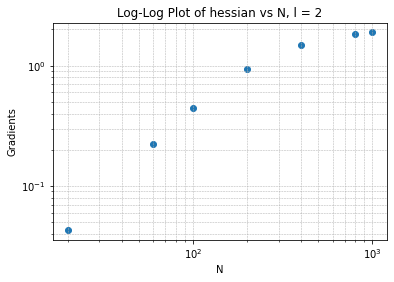

In [51]:
import matplotlib.pyplot as plt
plt.scatter(N,hess)
plt.yscale('log')
plt.xscale('log')
# Exclude the first point
N_fit = N[:]
grads_fit = hess[:]

# Perform linear fit
coefficients = np.polyfit(np.log(N_fit), np.log(grads_fit), 1)
print("Slope (coefficient[0]):", coefficients[0])
print("Intercept (coefficient[1]):", coefficients[1])
fit_line = np.poly1d(coefficients)

# Plot the fit line
#plt.plot(N_fit, np.exp(fit_line(np.log(N_fit))), label='Fit line', color='red')
#plt.legend()
plt.xlabel('N')
plt.ylabel('Gradients')
plt.title('Log-Log Plot of hessian vs N, l = 2')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.legend([f'Fit line: slope={coefficients[0]:.2f}, intercept={coefficients[1]:.2f}'])
plt.show()